Degree     | Train MSE       | Test MSE (The Judge)
-------------------------------------------------------
1          | 10.9167          | 16.5902
2          | 4.9007          | 5.6828
3          | 1.8361          | 1.3551
4          | 1.7978          | 1.4285
5          | 1.7937          | 1.4605
6          | 1.7933          | 1.4677
7          | 1.7904          | 1.4712
8          | 1.7751          | 1.3994
9          | 1.6925          | 1.6679
10         | 1.6859          | 1.8389
-------------------------------------------------------
🏆 The Winner is: DEGREE 3


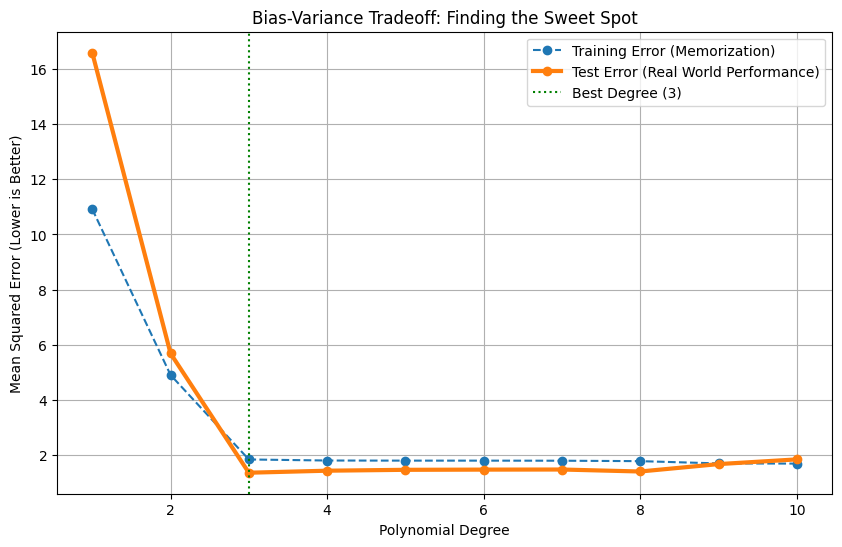

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. GENERATE "MYSTERY" DATA
# Imagine this is 'Engine Temperature' vs 'Efficiency'
# The true law of physics here is a cubic function (Degree 3)
np.random.seed(42) # Ensure consistent results
X = np.linspace(-3, 3, 100).reshape(-1, 1)

# True Function: y = 0.5*x^3 - x^2 + x + noise
y = 0.5 * X**3 - 1.0 * X**2 + X + np.random.normal(0, 1.5, size=len(X)).reshape(-1, 1)

# 2. SPLIT DATA (Hold-Out Strategy)
# We hide 20% of data to test the models later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. THE TOURNAMENT (Degrees 1 to 10)
degrees = range(1, 11)
train_errors = []
test_errors = []

print(f"{'Degree':<10} | {'Train MSE':<15} | {'Test MSE (The Judge)':<20}")
print("-" * 55)

for d in degrees:
    # A. Prepare the transformation
    poly = PolynomialFeatures(degree=d)
    
    # B. Transform both Train and Test data
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # C. Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # D. Predict
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # E. Calculate Score (Mean Squared Error)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)
    
    print(f"{d:<10} | {train_mse:.4f}          | {test_mse:.4f}")

# 4. DECLARE THE WINNER
# The best degree is the one with the lowest TEST Error
best_degree = degrees[np.argmin(test_errors)]
print("-" * 55)
print(f"🏆 The Winner is: DEGREE {best_degree}")

# 5. VISUALIZATION (The Validation Curve)
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error (Memorization)', marker='o', linestyle='--')
plt.plot(degrees, test_errors, label='Test Error (Real World Performance)', marker='o', linewidth=3)

plt.axvline(best_degree, color='green', linestyle=':', label=f'Best Degree ({best_degree})')

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (Lower is Better)')
plt.title('Bias-Variance Tradeoff: Finding the Sweet Spot')
plt.legend()
plt.grid(True)
plt.show()